In [1]:
import os
os.chdir("/content/drive/My Drive/CNN/Pokemon")

In [ ]:
from google.colab import files
files.upload()

! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json

!kaggle datasets download -d lantian773030/pokemonclassification

In [73]:
import zipfile
import tensorflow as tf
print("Version of tensorflow is : ",tf.__version__)
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style("darkgrid")
import numpy as np

Version of tensorflow is :  2.3.0


In [5]:
fl = "./pokemonclassification.zip"
try:
  os.mkdir("./data")
except:
  pass
fl = zipfile.ZipFile(fl , 'r')
fl.extractall("./data")

In [8]:
data_floder = "./data/PokemonData"
print(os.listdir(data_floder))

['Abra', 'Aerodactyl', 'Alakazam', 'Alolan Sandslash', 'Arbok', 'Arcanine', 'Articuno', 'Beedrill', 'Bellsprout', 'Blastoise', 'Bulbasaur', 'Butterfree', 'Caterpie', 'Chansey', 'Charizard', 'Charmander', 'Charmeleon', 'Clefable', 'Clefairy', 'Cloyster', 'Cubone', 'Dewgong', 'Diglett', 'Ditto', 'Dodrio', 'Doduo', 'Dragonair', 'Dragonite', 'Dratini', 'Drowzee', 'Dugtrio', 'Eevee', 'Ekans', 'Electabuzz', 'Electrode', 'Exeggcute', 'Exeggutor', 'Farfetchd', 'Fearow', 'Flareon', 'Gastly', 'Gengar', 'Geodude', 'Gloom', 'Golbat', 'Goldeen', 'Golduck', 'Golem', 'Graveler', 'Grimer', 'Growlithe', 'Gyarados', 'Haunter', 'Hitmonchan', 'Hitmonlee', 'Horsea', 'Hypno', 'Ivysaur', 'Jigglypuff', 'Jolteon', 'Jynx', 'Kabuto', 'Kabutops', 'Kadabra', 'Kakuna', 'Kangaskhan', 'Kingler', 'Koffing', 'Krabby', 'Lapras', 'Lickitung', 'Machamp', 'Machoke', 'Machop', 'Magikarp', 'Magmar', 'Magnemite', 'Magneton', 'Mankey', 'Marowak', 'Meowth', 'Metapod', 'Mew', 'Mewtwo', 'Moltres', 'MrMime', 'Muk', 'Nidoking', 'Ni

In [12]:
abra_dir = "./data/PokemonData/Abra/"
print(os.listdir(abra_dir)[0])

0282b2f3a22745f1a436054ea15a0ae5.jpg


In [17]:
img_path = abra_dir+os.listdir(abra_dir)[0]
img = tf.keras.preprocessing.image.load_img(img_path)
img = tf.keras.preprocessing.image.img_to_array(img)
print("Shape of image : ",img.shape)

Shape of image :  (220, 229, 3)


In [55]:
data = tf.keras.preprocessing.image.ImageDataGenerator(rescale=(1.0 / 255.0))

In [56]:
data = data_gen.flow_from_directory(data_floder,batch_size=32,target_size=(256,256),class_mode='categorical')

Found 6820 images belonging to 150 classes.


In [40]:
train_model = tf.keras.applications.VGG16(include_top=False,weights='imagenet',input_shape=(256,256,3))

In [30]:
layer_name = [layer.name for layer in train_model.layers[:]]
layer_name

['input_1',
 'block1_conv1',
 'block1_conv2',
 'block1_pool',
 'block2_conv1',
 'block2_conv2',
 'block2_pool',
 'block3_conv1',
 'block3_conv2',
 'block3_conv3',
 'block3_pool',
 'block4_conv1',
 'block4_conv2',
 'block4_conv3',
 'block4_pool',
 'block5_conv1',
 'block5_conv2',
 'block5_conv3',
 'block5_pool']

In [31]:
train_model.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 150, 150, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 37, 37, 128)       0     

In [45]:
need_train = False
for layer in train_model.layers:
  if layer.name == 'block5_conv1':
    need_train = True
  layer.trainable = need_train

In [46]:
train_model.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 256, 256, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 256, 256, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 256, 256, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 128, 128, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 128, 128, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 128, 128, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 64, 64, 128)       0     

In [61]:
model = tf.keras.models.Sequential()
model.add(train_model)
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(128 , activation="relu"))
model.add(tf.keras.layers.Dense(128 , activation="relu"))
model.add(tf.keras.layers.Dense(150 , activation="softmax"))

In [62]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Functional)           (None, 8, 8, 512)         14714688  
_________________________________________________________________
flatten_4 (Flatten)          (None, 32768)             0         
_________________________________________________________________
dense_12 (Dense)             (None, 128)               4194432   
_________________________________________________________________
dense_13 (Dense)             (None, 128)               16512     
_________________________________________________________________
dense_14 (Dense)             (None, 150)               19350     
Total params: 18,944,982
Trainable params: 11,309,718
Non-trainable params: 7,635,264
_________________________________________________________________


In [63]:
model.compile(optimizer=tf.keras.optimizers.RMSprop(lr=1e-5) , loss=tf.keras.losses.categorical_crossentropy,metrics=['acc'])

In [64]:
class MyCallBack(tf.keras.callbacks.Callback):
  def on_epoch_end(self , epoch , logs ={}):
    if logs['acc'] > 0.99:
      print("\nStop Training , acc on train data : 99 %")
      self.model.stop_training = True

In [65]:
mcallb = MyCallBack
his1 = model.fit(data , steps_per_epoch=data.n//data.batch_size , epochs=25,callbacks=[mcallb()])

Epoch 1/25
213/213 [==============================] - 50s 234ms/step - loss: 4.8574 - acc: 0.0404
Epoch 2/25
213/213 [==============================] - 50s 233ms/step - loss: 3.8546 - acc: 0.2030
Epoch 3/25
213/213 [==============================] - 49s 231ms/step - loss: 2.8587 - acc: 0.3963
Epoch 4/25
213/213 [==============================] - 49s 230ms/step - loss: 2.0533 - acc: 0.5536
Epoch 5/25
213/213 [==============================] - 49s 231ms/step - loss: 1.4449 - acc: 0.6852
Epoch 6/25
213/213 [==============================] - 49s 232ms/step - loss: 0.9912 - acc: 0.7904
Epoch 7/25
213/213 [==============================] - 49s 231ms/step - loss: 0.6595 - acc: 0.8586
Epoch 8/25
213/213 [==============================] - 50s 234ms/step - loss: 0.4171 - acc: 0.9188
Epoch 9/25
213/213 [==============================] - 49s 231ms/step - loss: 0.2549 - acc: 0.9552
Epoch 10/25
213/213 [==============================] - 49s 232ms/step - loss: 0.1511 - acc: 0.9783
Epoch 11/25
213/213

Text(0.5, 1.0, 'Cross_entropy')

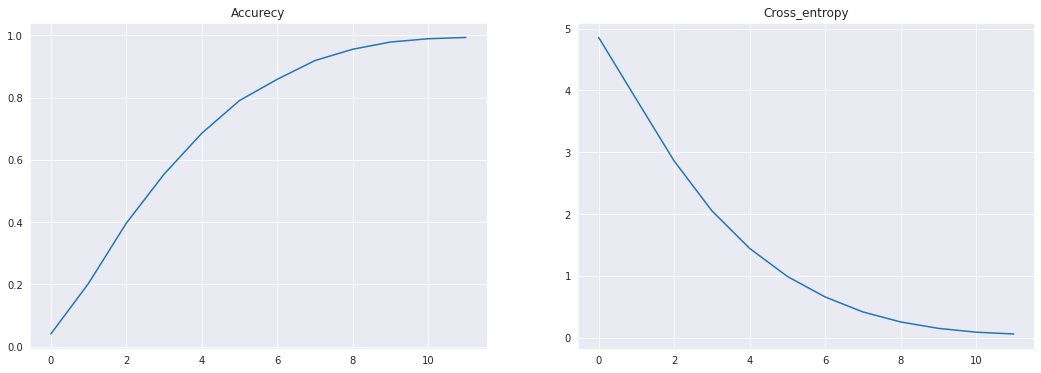

In [67]:
_ , ax = plt.subplots(1,2,figsize=(18,6))

ax[0].plot(his1.history['acc'])
ax[0].set_title("Accurecy")

ax[1].plot(his1.history['loss'])
ax[1].set_title("Cross_entropy")

In [79]:
pred = {}
for k , v in data.class_indices.items():
  pred[v] = k

In [87]:
def pred_loc(path):
  #path = "https://i.insider.com/5cd46fae93a15201580b7535?width=1100&format=jpeg&auto=webp"
  #img1 = tf.keras.utils.get_file("img1.png",path)
  img = tf.keras.preprocessing.image.load_img(path , target_size=(256 , 256 , 3))
  img = tf.keras.preprocessing.image.img_to_array(img)
  print("Shape of img : ",img.shape)
  img = img / 255
  plt.imshow(img)
  plt.grid(False)
  plt.title(pred[model.predict_classes(img[np.newaxis , :])[0]])

Shape of img :  (256, 256, 3)


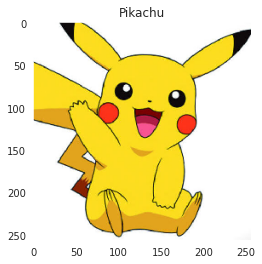

In [85]:
pred_loc("/content/drive/My Drive/CNN/Pokemon/data/PokemonData/Pikachu/0cdf621bbee34f768b89d6a519f52f1c.jpg")

In [88]:
import string 
import random
def pred_url(path , exten = ".png"):
  res = ''.join(random.choices(string.ascii_uppercase +string.digits, k = 10))
  res = res + exten
  img1 = tf.keras.utils.get_file(res,path)
  img = tf.keras.preprocessing.image.load_img(img1 , target_size=(256 , 256 , 3))
  img = tf.keras.preprocessing.image.img_to_array(img)
  print("Shape of img : ",img.shape)
  img = img / 255
  plt.imshow(img)
  plt.grid(False)
  plt.title(pred[model.predict_classes(img[np.newaxis , :])[0]])

49152/47161 [===============================] - 0s 0us/step
Shape of img :  (256, 256, 3)


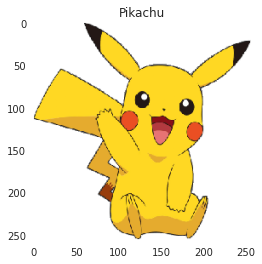

In [89]:
pred_url("https://i.pinimg.com/originals/76/47/9d/76479dd91dc55c2768ddccfc30a4fbf5.png")

57344/53678 [================================] - 0s 0us/step
Shape of img :  (256, 256, 3)


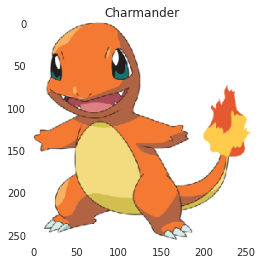

In [90]:
pred_url("https://vignette.wikia.nocookie.net/sonicpokemon/images/e/e0/Charmander_AG_anime.png/revision/latest/scale-to-width-down/340?cb=20130714191911")

In [66]:
data_gen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=(1.0 / 255.0),
                                                       width_shift_range=0.25,
                                                       height_shift_range=0.25,
                                                       zoom_range=0.25,
                                                       horizontal_flip=True,
                                                       rotation_range=40)
data = data_gen.flow_from_directory(data_floder,batch_size=32,target_size=(256,256),class_mode='categorical')

Found 6820 images belonging to 150 classes.
